In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
# import os, sys, getpass
# user = getpass.getuser()
# sys.path.append(f'/home/{user}/codes/hpe_library/')
# from hpe_library.lib_import import *
# from hpe_library. my_utils import *
# os.chdir('/home/hrai/codes/MotionBERT')
from common_import import *

In [2]:
data_type_list = ['source_list', 'cam_param', 'cam_param_adaptive_focal',
                  'cam_3d', 'img_2d', 'world_3d', 
                  'img_3d', 'scale_factor', 'img_25d', 
                  'cam_3d_canonical_same_z', 'img_2d_canonical_same_z', 
                  'cam_3d_canonical_same_dist', 'img_2d_canonical_same_dist',
                  'cam_3d_canonical_fixed_dist_5', 'img_2d_canonical_fixed_dist_5'
                  ]
overwrite_list = []
dataset_name = '3dhp'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading 3DHP source_list...
[overwrite: False] ==> Loading 3DHP cam_param...
[overwrite: False] ==> Loading 3DHP cam_param-adaptive_focal...
[overwrite: False] ==> Loading 3DHP cam_3d...
[overwrite: False] ==> Loading 3DHP img_2d...
[overwrite: False] ==> Loading 3DHP world_3d...
[overwrite: False] ==> Loading 3DHP img_3d...
[overwrite: False] ==> Loading 3DHP scale_factor...
[overwrite: False] ==> Loading 3DHP img_25d...
[overwrite: False] ==> Loading 3DHP cam_3d_canonical_same_z...
[overwrite: False] ==> Loading 3DHP img_2d_canonical_same_z...
[overwrite: False] ==> Loading 3DHP cam_3d_canonical_same_dist...
[overwrite: False] ==> Loading 3DHP img_2d_canonical_same_dist...
[overwrite: False] ==> Loading 3DHP cam_3d_canonical_fixed_dist_5...
[overwrite: False] ==> Loading 3DHP img_2d_canonical_fixed_dist_5...


In [4]:
# dataset_name = '3dhp'
# overwrite_list = []
# source_list                    = load_data(dataset_name=dataset_name, data_type='source_list', overwrite_list=overwrite_list)
# cam_params                     = load_data(dataset_name=dataset_name, data_type='cam_param', overwrite_list=overwrite_list)
# world_3ds                      = load_data(dataset_name=dataset_name, data_type='world_3d', overwrite_list=overwrite_list)
# cam_3ds                        = load_data(dataset_name=dataset_name, data_type='cam_3d', overwrite_list=overwrite_list)
# img_2ds                        = load_data(dataset_name=dataset_name, data_type='img_2d', overwrite_list=overwrite_list)
# img_3ds                        = load_data(dataset_name=dataset_name, data_type='img_3d', overwrite_list=overwrite_list)
# scale_factors                  = load_data(dataset_name=dataset_name, data_type='scale_factor', overwrite_list=overwrite_list)
# img_25ds                       = load_data(dataset_name=dataset_name, data_type='img_25d', overwrite_list=overwrite_list)
# cam_3d_canonicals_same_z       = load_data(dataset_name=dataset_name, data_type='cam_3d_canonical', canonical_type='same_z', overwrite_list=overwrite_list)
# cam_3d_canonicals_same_dist    = load_data(dataset_name=dataset_name, data_type='cam_3d_canonical', canonical_type='same_dist', overwrite_list=overwrite_list)
# cam_3d_canonicals_fixed_dist_5 = load_data(dataset_name=dataset_name, data_type='cam_3d_canonical', canonical_type='fixed_dist_5', overwrite_list=overwrite_list)
# img_2d_canonicals_same_z       = load_data(dataset_name=dataset_name, data_type='img_2d_canonical', canonical_type='same_z', overwrite_list=overwrite_list)
# img_2d_canonicals_same_dist    = load_data(dataset_name=dataset_name, data_type='img_2d_canonical', canonical_type='same_dist', overwrite_list=overwrite_list)
# img_2d_canonicals_fixed_dist_5 = load_data(dataset_name=dataset_name, data_type='img_2d_canonical', canonical_type='fixed_dist_5', overwrite_list=overwrite_list)

In [3]:
source = data['source_list'][0]
subject, cam_id, action = split_source_name(source, dataset_name)
print(subject, cam_id, action)
# cam param
cam_param = data['cam_param'][subject][action][cam_id]
W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
fx, fy, cx, cy = intrinsic[0][0], intrinsic[1][1], intrinsic[0][2], intrinsic[1][2]
# img 2d
img_2d = data['img_2d'][subject][action][cam_id].copy()
img_2d_norm = normalize_input(img_2d, W, H)
# inverse projection
img_2d_inverse_proj = img_2d.copy()
img_2d_inverse_proj[:, :, 0] = (img_2d_inverse_proj[:, :, 0] - cx) / fx
img_2d_inverse_proj[:, :, 1] = (img_2d_inverse_proj[:, :, 1] - cy) / fy

S1 cam0 Seq1


In [5]:
# init figure
fig = plt.figure(0)
fig.clear()
ax_img_2d = axes_2d(fig, loc=121, W=W, H=H, normalize=True)
ax_img_2d_ip = axes_2d(fig, loc=122, normalize=True)
ax_img_2d.set_title('2D pose')
ax_img_2d_ip.set_title('Inverse projected 2D pose')

Text(0.5, 1.0, 'Inverse projected 2D pose')

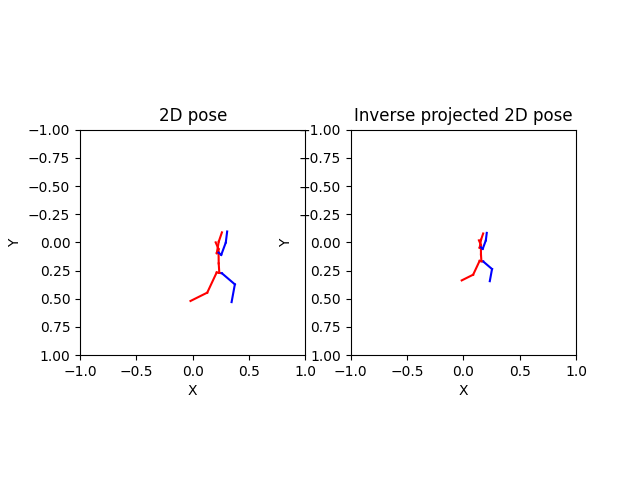

In [6]:
# frame example
frame_num = 300
clear_axes([ax_img_2d, ax_img_2d_ip])
draw_2d_pose(ax_img_2d, img_2d_norm[frame_num], W=W, H=H, normalize=True)
draw_2d_pose(ax_img_2d_ip, img_2d_inverse_proj[frame_num], normalize=True)
plt.show()

In [8]:
# video example
save_folder = f'/home/{user}/codes/MotionBERT/videos/input/inverse_projection/{dataset_name}'
if not os.path.exists(save_folder): os.makedirs(save_folder)
save_path = os.path.join(save_folder, f'inverse_projected_2d_pose_{subject}_{cam_id}_{action}.mp4')

ax_pose = [(ax_img_2d, img_2d_norm), (ax_img_2d_ip, img_2d_inverse_proj)]
generate_pose_video(fig, save_path, ax_pose, fps=5, stride=6, normalize_2d=True)

Already exists: /home/hrai/codes/MotionBERT/videos/input/inverse_projection/3dhp/inverse_projected_2d_pose_S1_cam0_Seq1.mp4


In [37]:
source_list = data['source_list'].copy()
random.shuffle(source_list)

In [39]:
save_folder = f'/home/{user}/codes/MotionBERT/videos/input/inverse_projection/{dataset_name}'
if not os.path.exists(save_folder): os.makedirs(save_folder)

for source in source_list[:10]:
    subject, cam_id, action = split_source_name(source, dataset_name)
    save_path = os.path.join(save_folder, f'inverse_projected_2d_pose_{subject}_{cam_id}_{action}.mp4')
    if os.path.exists(save_path): continue
    # cam param
    cam_param = data['cam_param'][subject][action][cam_id]
    W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
    fx, fy, cx, cy = intrinsic[0][0], intrinsic[1][1], intrinsic[0][2], intrinsic[1][2]
    # img 2d
    img_2d = data['img_2d'][subject][action][cam_id].copy()
    img_2d_norm = normalize_input(img_2d, W, H)
    # inverse projection
    img_2d_inverse_proj = img_2d.copy()
    img_2d_inverse_proj[:, :, 0] = (img_2d_inverse_proj[:, :, 0] - cx) / fx
    img_2d_inverse_proj[:, :, 1] = (img_2d_inverse_proj[:, :, 1] - cy) / fy
    ax_pose = [(ax_img_2d, img_2d_norm), (ax_img_2d_ip, img_2d_inverse_proj)]
    generate_pose_video(fig, save_path, ax_pose, fps=5, stride=6, normalize_2d=True)
    

  0%|          | 0/953 [00:00<?, ?it/s]

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1388, 702) to (1392, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
100%|██████████| 1026/1026 [00:47<00:00, 21.77it/s]


### H36M

In [40]:
data_type_list = ['source_list', 'cam_param', 'cam_param_adaptive_focal',
                  'cam_3d', 'img_2d', 'world_3d', 
                  'img_3d', 'scale_factor', 'img_25d', 
                  'cam_3d_canonical_same_z', 'img_2d_canonical_same_z', 
                  'cam_3d_canonical_same_dist', 'img_2d_canonical_same_dist',
                  'cam_3d_canonical_fixed_dist_5', 'img_2d_canonical_fixed_dist_5'
                  ]
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_param-adaptive_focal...
[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M img_2d...
[overwrite: False] ==> Loading H36M world_3d...
[overwrite: False] ==> Loading H36M img_3d...
[overwrite: False] ==> Loading H36M scale_factor...
[overwrite: False] ==> Loading H36M img_25d...
[overwrite: False] ==> Loading H36M cam_3d_canonical_same_z...
[overwrite: False] ==> Loading H36M img_2d_canonical_same_z...
[overwrite: False] ==> Loading H36M cam_3d_canonical_same_dist...
[overwrite: False] ==> Loading H36M img_2d_canonical_same_dist...
[overwrite: False] ==> Loading H36M cam_3d_canonical_fixed_dist_5...
[overwrite: False] ==> Loading H36M img_2d_canonical_fixed_dist_5...


In [41]:
source_list = data['source_list'].copy()
random.shuffle(source_list)
save_folder = f'/home/{user}/codes/MotionBERT/videos/input/{dataset_name}/inverse_projection'
if not os.path.exists(save_folder): os.makedirs(save_folder)

for source in source_list[:10]:
    subject, cam_id, action = split_source_name(source, dataset_name)
    save_path = os.path.join(save_folder, f'inverse_projected_2d_pose_{subject}_{cam_id}_{action}.mp4')
    if os.path.exists(save_path): continue
    # cam param
    cam_param = data['cam_param'][subject][action][cam_id]
    W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
    fx, fy, cx, cy = intrinsic[0][0], intrinsic[1][1], intrinsic[0][2], intrinsic[1][2]
    # img 2d
    img_2d = data['img_2d'][subject][action][cam_id].copy()
    img_2d_norm = normalize_input(img_2d, W, H)
    # inverse projection
    img_2d_inverse_proj = img_2d.copy()
    img_2d_inverse_proj[:, :, 0] = (img_2d_inverse_proj[:, :, 0] - cx) / fx
    img_2d_inverse_proj[:, :, 1] = (img_2d_inverse_proj[:, :, 1] - cy) / fy
    ax_pose = [(ax_img_2d, img_2d_norm), (ax_img_2d_ip, img_2d_inverse_proj)]
    generate_pose_video(fig, save_path, ax_pose, fps=5, stride=6, normalize_2d=True)
    

100%|██████████| 812/812 [00:37<00:00, 21.40it/s]


### Fit3D

In [ ]:
data_type_list = ['source_list', 'cam_param', 'cam_param_adaptive_focal',
                  'cam_3d', 'img_2d', 'world_3d', 
                  'img_3d', 'scale_factor', 'img_25d', 
                  'cam_3d_canonical_same_z', 'img_2d_canonical_same_z', 
                  'cam_3d_canonical_same_dist', 'img_2d_canonical_same_dist',
                  'cam_3d_canonical_fixed_dist_5', 'img_2d_canonical_fixed_dist_5'
                  ]
overwrite_list = []
dataset_name = 'fit3d'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

In [ ]:
source_list = data['source_list'].copy()
random.shuffle(source_list)
save_folder = f'/home/{user}/codes/MotionBERT/videos/input/{dataset_name}/inverse_projection'
if not os.path.exists(save_folder): os.makedirs(save_folder)

for source in source_list[:10]:
    subject, cam_id, action = split_source_name(source, dataset_name)
    save_path = os.path.join(save_folder, f'inverse_projected_2d_pose_{subject}_{cam_id}_{action}.mp4')
    if os.path.exists(save_path): continue
    # cam param
    cam_param = data['cam_param'][subject][action][cam_id]
    W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
    fx, fy, cx, cy = intrinsic[0][0], intrinsic[1][1], intrinsic[0][2], intrinsic[1][2]
    # img 2d
    img_2d = data['img_2d'][subject][action][cam_id].copy()
    img_2d_norm = normalize_input(img_2d, W, H)
    # inverse projection
    img_2d_inverse_proj = img_2d.copy()
    img_2d_inverse_proj[:, :, 0] = (img_2d_inverse_proj[:, :, 0] - cx) / fx
    img_2d_inverse_proj[:, :, 1] = (img_2d_inverse_proj[:, :, 1] - cy) / fy
    ax_pose = [(ax_img_2d, img_2d_norm), (ax_img_2d_ip, img_2d_inverse_proj)]
    generate_pose_video(fig, save_path, ax_pose, fps=5, stride=6, normalize_2d=True)
    